# Logistic Regression

### Import library required
Library yang digunakan adalah **pandas, numpy, matplotlib, seaborn, dan sklearn**. Silahkan install terlebih dahulu jika belum menginstallnya dengan perintah `pip install nama-library`.

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Load Data
Data yang digunakan adalah data bawaan sklearn library. Jika ingin menggunakan data sendiri silahkan pakai perintah `pd.read_csv()` atau `pd.read_excel()`

In [58]:
digits = load_digits()
print(digits.data.shape[0], 'Rows\n', digits.data.shape[1], 'Columns')

1797 Rows
 64 Columns


This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

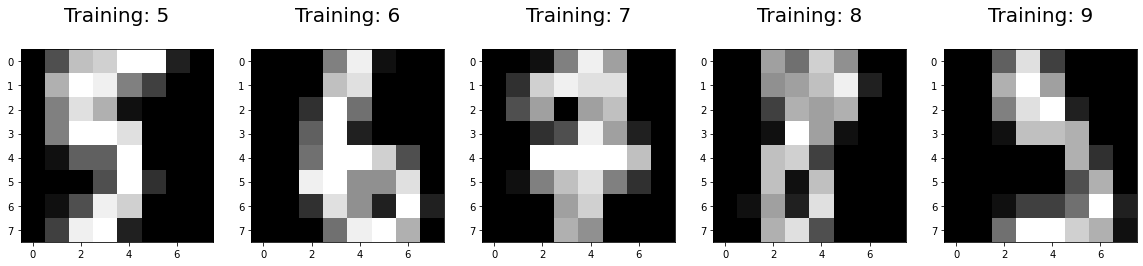

In [59]:
plt.figure(figsize=(20,4))

for i, (image, label) in enumerate(zip(digits.data[15:20], digits.target[15:20])):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

Tujuan dari clasifikasi ini adalah untuk membuat model yang dapat membaca angka pada gambar tersebut.

### Split Data
Fungsi `train_test_split`, secara default akan membagi data menjadi 75% data training dan 25% data test. Untuk mengaturnya dapat menggunakan argument `test_size` atau `train_size`. Contoh `train_test_split(X, y, train_test = 0.8)`

In [61]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.20)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  1437  | Jumlah Test Data :  360


In [62]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.get_params()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Test to Predict Data

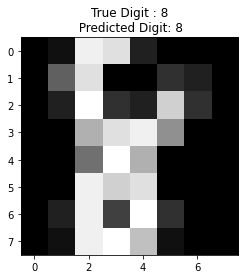

In [63]:
i = 1
predDigit = clf.predict(X_test[i].reshape(1,-1))[0]

plt.figure()
plt.imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray)
plt.title('True Digit : {}\n Predicted Digit: {}'.format(y_test[i],predDigit));

### Check Accuracy 

In [65]:
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)

Accuracy :  0.9666666666666667


### Confusion Matrix

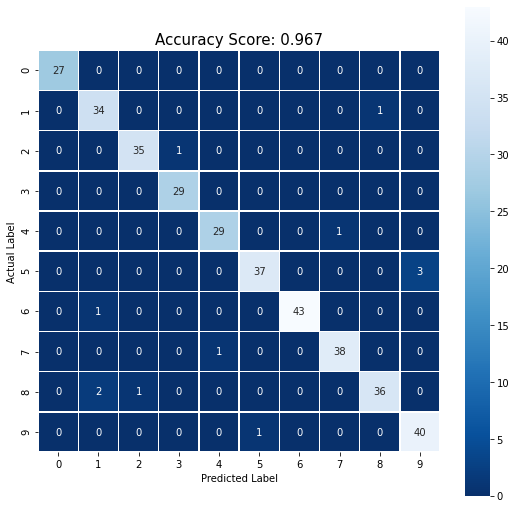

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='Blues_r', linewidth=0.5)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Accuracy Score: {:.3}'.format(accuracy), size=15);

### Logistic Regression Pada Data Iris

In [67]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Split Data

In [68]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  120  | Jumlah Test Data :  30


In [69]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Check Accuracy

In [70]:
print('Accuracy: ', clf.score(X_test, y_test))

Accuracy:  1.0


#### Make Prediction
Misalnya kita memiliki bunga dengan sepal_length = 0.4, sepal_width = 1, petal_length = 2.3, dan petal_width = 2.5

In [72]:
predict = clf.predict([[0.4,1,2.3,2.5]])
data.target_names[predict][0]

'setosa'